In [1]:
import os
import gym
import slimevolleygym
import numpy as np

from stable_baselines.ppo1 import PPO1
from stable_baselines import TRPO
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import logger
from stable_baselines.common.callbacks import EvalCallback
from stable_baselines.bench import Monitor

from model import BnnPolicy

C:\Users\notes\Anaconda3\envs\slime-rl\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\notes\Anaconda3\envs\slime-rl\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\notes\Anaconda3\envs\slime-rl\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\notes\Anaconda3\envs\slime-rl\lib\

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
import gym
import slimevolleygym
import tqdm.notebook as tqdm

def evaluate(p1, p2, n=100):
    env = gym.make("SlimeVolley-v0")
    p1_scores=[]
    p2_scores=[]
    
    for i in tqdm.tqdm(range(n)):
        obs1 = env.reset()
        obs2 = obs1 # both sides always see the same initial observation.

        done = False
        total_reward = 0

        while not done:

            action1, _ = p1.predict(obs1)
            action2, _ = p2.predict(obs2)

            obs1, reward, done, info = env.step(action1, action2) # extra argument
            obs2 = info['otherObs']

            total_reward += reward
            # env.render()
        p1_scores.append(total_reward)
        p2_scores.append(-total_reward)
        
    p1_score = np.mean(p1_scores)
    p2_score = np.mean(p2_scores)
    
    p1_var = np.std(p1_scores)
    p2_var = np.std(p2_scores)
    
    print(f"Player 1: {p1_score} +- {p1_var:.3f}")
    print(f"Player 2: {p2_score} +- {p2_var:.3f}")
        
    return p1_score, p2_score, p1_var, p2_var

# Evaluate PPO

In [4]:
ppo_dnn = PPO1.load(os.path.join("exp/self/ppo-dnn", "final_model"))
ppo_bnn = PPO1.load(os.path.join("exp/self/ppo-bnn", "final_model"))

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [33]:
dnn_score, bnn_score, dnn_var, bnn_var = evaluate(dnn, bnn, n=1000)


DNN: -4.031 += 1.279
BNN: 4.031 += 1.279


In [45]:
trpo_dnn = TRPO.load(os.path.join("exp/self/trpo-dnn", "final_model"))

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [47]:
evaluate(trpo_dnn, ppo_dnn, n=100)
evaluate(trpo_dnn, ppo_bnn, n=100)


Player 1: -0.57 +- 2.688
Player 2: 0.57 +- 2.688



Player 1: -4.25 +- 1.081
Player 2: 4.25 +- 1.081


(-4.25, 4.25, 1.0805091392487154, 1.0805091392487154)

# PPO Performance Curve

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

LOGDIR = "exp/self/ppo-dnn"
pd_ppo_dnn_self = pd.read_csv(os.path.join(LOGDIR, "progress.csv"))

LOGDIR = "exp/self/ppo-bnn"
pd_ppo_bnn_self = pd.read_csv(os.path.join(LOGDIR, "progress.csv"))

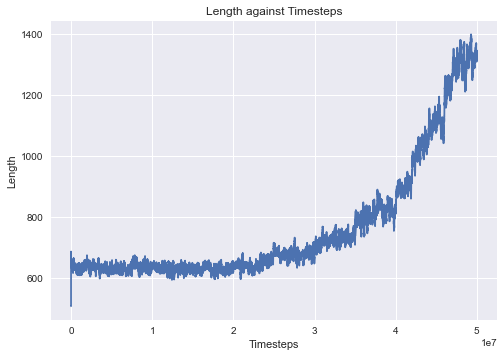

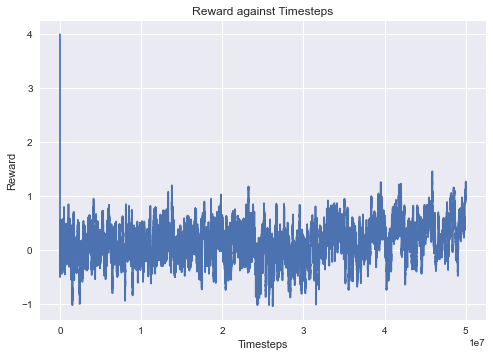

In [67]:
plt.plot(pd_ppo_dnn_self['TimestepsSoFar'], pd_ppo_dnn_self['EpLenMean'])
plt.title("Length against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Length")
plt.show()

plt.plot(pd_ppo_dnn_self['TimestepsSoFar'], pd_ppo_dnn_self['EpRewMean'])
plt.title("Reward against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.show()

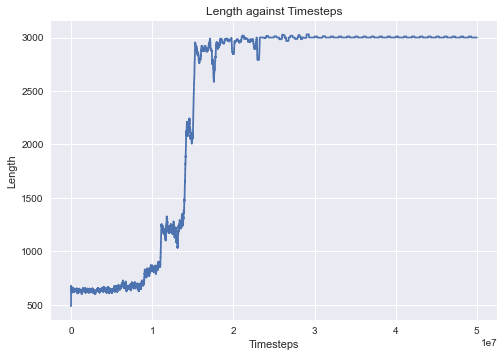

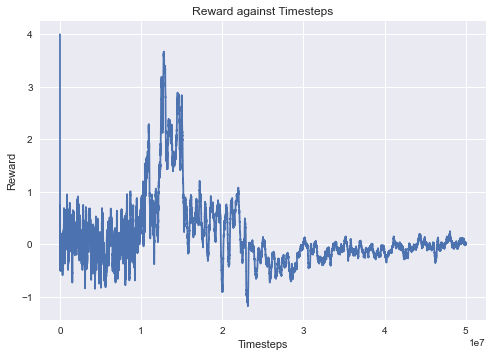

In [68]:
plt.plot(pd_ppo_bnn_self['TimestepsSoFar'], pd_ppo_bnn_self['EpLenMean'])
plt.title("Length against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Length")
plt.show()

plt.plot(pd_ppo_bnn_self['TimestepsSoFar'], pd_ppo_bnn_self['EpRewMean'])
plt.title("Reward against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.show()

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

LOGDIR = "exp/self/trpo-dnn"
pd_trpo_dnn_self = pd.read_csv(os.path.join(LOGDIR, "progress.csv"))

LOGDIR = "exp/self/trpo-bnn"
pd_trpo_bnn_self = pd.read_csv(os.path.join(LOGDIR, "progress.csv"))

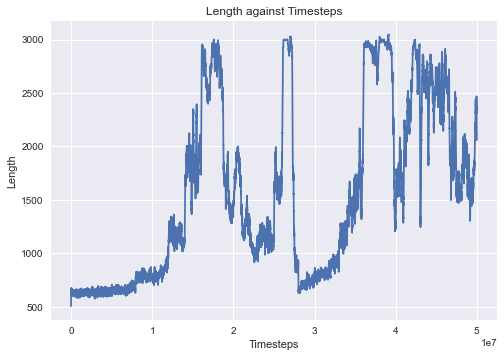

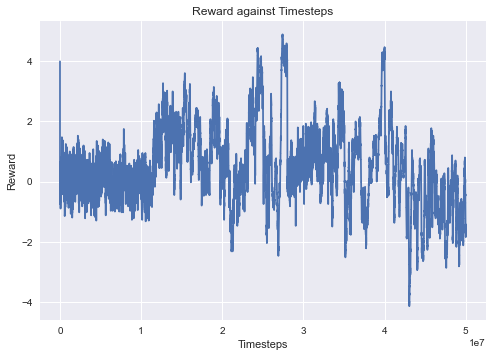

In [69]:
plt.plot(pd_trpo_dnn_self['TimestepsSoFar'], pd_trpo_dnn_self['EpLenMean'])
plt.title("Length against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Length")
plt.show()

plt.plot(pd_trpo_dnn_self['TimestepsSoFar'], pd_trpo_dnn_self['EpRewMean'])
plt.title("Reward against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.show()

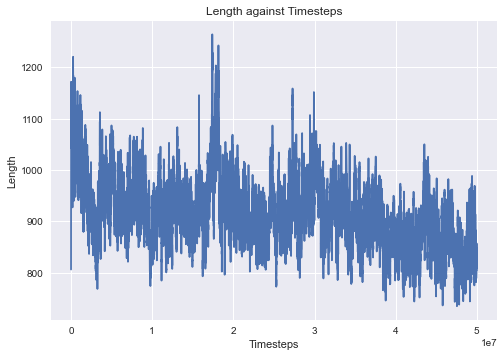

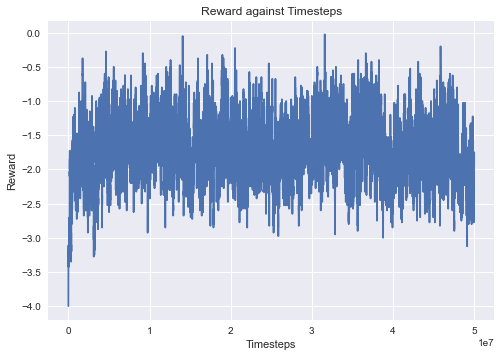

In [70]:
plt.plot(pd_trpo_bnn_self['TimestepsSoFar'], pd_trpo_bnn_self['EpLenMean'])
plt.title("Length against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Length")
plt.show()

plt.plot(pd_trpo_bnn_self['TimestepsSoFar'], pd_trpo_bnn_self['EpRewMean'])
plt.title("Reward against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.show()

# Evaluate TRPO

In [5]:
trpo_dnn = TRPO.load(os.path.join("exp/self/trpo-dnn", "final_model"))
trpo_bnn = TRPO.load(os.path.join("exp/self/trpo-bnn", "final_model"))

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [9]:
dnn_score, bnn_score, dnn_var, bnn_var = evaluate(trpo_dnn, trpo_bnn, n=100)


Player 1: 0.72 +- 2.933
Player 2: -0.72 +- 2.933


In [11]:
evaluate(ppo_dnn, trpo_dnn, n=10)  # PPO-DNN > TRPO-DNN: 1.6
evaluate(ppo_dnn, trpo_bnn, n=10)  # PPO-DNN > TRPO-BNN: 3.1
evaluate(ppo_dnn, ppo_bnn, n=10)  # PPO-DNN < PPO-BNN: -3.6

evaluate(trpo_dnn, trpo_bnn, n=10)  # TRPO-DNN > TRPO-BNN: 1.5
evaluate(trpo_dnn, ppo_bnn, n=10)  # TRPO-DNN < PPO-BNN: -4.0

evaluate(trpo_bnn, ppo_bnn, n=10)  # TRPO-BNN < PPO-BNN: -4.4


Player 1: 1.6 +- 2.289
Player 2: -1.6 +- 2.289



Player 1: 3.1 +- 1.578
Player 2: -3.1 +- 1.578



Player 1: -3.6 +- 1.356
Player 2: 3.6 +- 1.356



Player 1: 1.5 +- 2.500
Player 2: -1.5 +- 2.500



Player 1: -4.0 +- 0.894
Player 2: 4.0 +- 0.894



Player 1: -4.4 +- 1.020
Player 2: 4.4 +- 1.020


(-4.4, 4.4, 1.0198039027185568, 1.0198039027185568)

# TRPO Performance Cruve

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

LOGDIR = "exp/self/trpo-dnn"
pd_trpo_dnn_self = pd.read_csv(os.path.join(LOGDIR, "progress.csv"))

LOGDIR = "exp/self/trpo-bnn"
pd_trpo_bnn_self = pd.read_csv(os.path.join(LOGDIR, "progress.csv"))

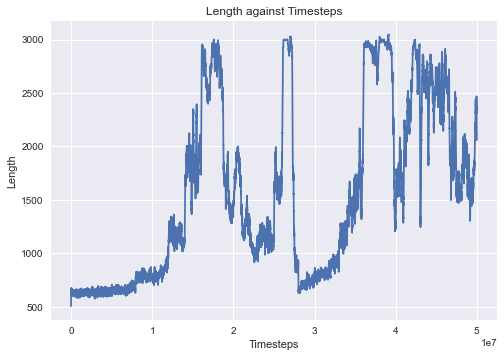

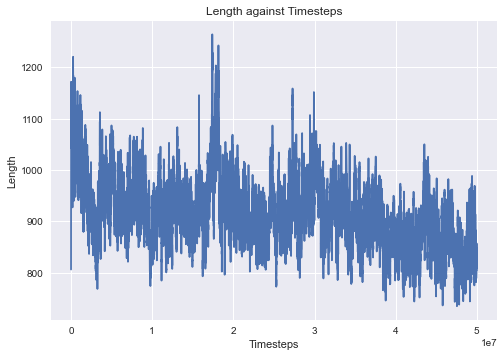

In [15]:
plt.plot(pd_trpo_dnn_self['TimestepsSoFar'], pd_trpo_dnn_self['EpLenMean'])
plt.title("Length against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Length")
plt.show()

plt.plot(pd_trpo_bnn_self['TimestepsSoFar'], pd_trpo_bnn_self['EpLenMean'])
plt.title("Length against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Length")
plt.show()

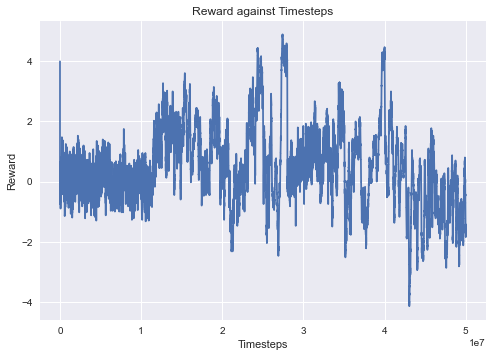

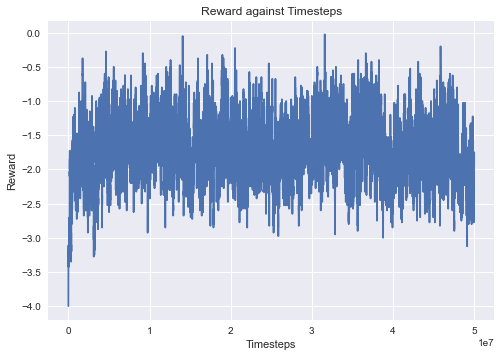

In [18]:
plt.plot(pd_trpo_dnn_self['TimestepsSoFar'], pd_trpo_dnn_self['EpRewMean'])
plt.title("Reward against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.show()

plt.plot(pd_trpo_bnn_self['TimestepsSoFar'], pd_trpo_bnn_self['EpRewMean'])
plt.title("Reward against Timesteps")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.show()